In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def get_best_acc(path: str) -> float:
    with open(path) as f:
        best_acc = float(f.readlines()[-3].split()[-1])
        return best_acc

def agg_results(res):
    res = np.array(res)
    mean = np.mean(res, axis=1)
    std = np.std(res, axis=1)
    min = np.min(res, axis=1)
    max = np.min(res, axis=1)
    return mean, std, abs(mean - min), abs(mean - max)

def process_results_dict(results):
    for setting, res in results.items():
        results[setting] = agg_results(res)
    
    return results


In [23]:
settings = ["crossed-ring-gin", "crossed-ring-gcn", "crossed-ring-sage", "crossed-ring-gat",
"ring-gin", "ring-gcn", "ring-sage", "ring-gat"]
settings += ["lollipop-gin", "lollipop-gcn", "lollipop-sage", "lollipop-gat"]
settings += [f"ring-gcn-hidden-dim-{dim}" for dim in [1, 2, 4, 8 ,16, 32]]
settings += [f"crossed-ring-gcn-hidden-dim-{dim}" for dim in [1, 2, 4, 8 ,16, 32]]
settings += [f"lollipop-gcn-hidden-dim-{dim}" for dim in [1, 2, 4, 8 ,16, 32]]

results = {setting: [] for setting in settings}

# sizes = np.arange(10, 32, 2)
distances = np.arange(2, 16, 1)

for setting in settings:
    for distance in distances:
        accs = []

        if "lollipop" in setting:
            size = (distance - 1) * 2
        elif "ring" in setting:
            size = distance * 2
        for seed in range(1, 4):
            path = f"../synthetic_raw_results/{setting}/size-{size}-seed-{seed}"
            try:
                acc = get_best_acc(path)
            except Exception:
                print(path)
                break
            accs.append(acc)
        results[setting].append(accs)

results = process_results_dict(results)

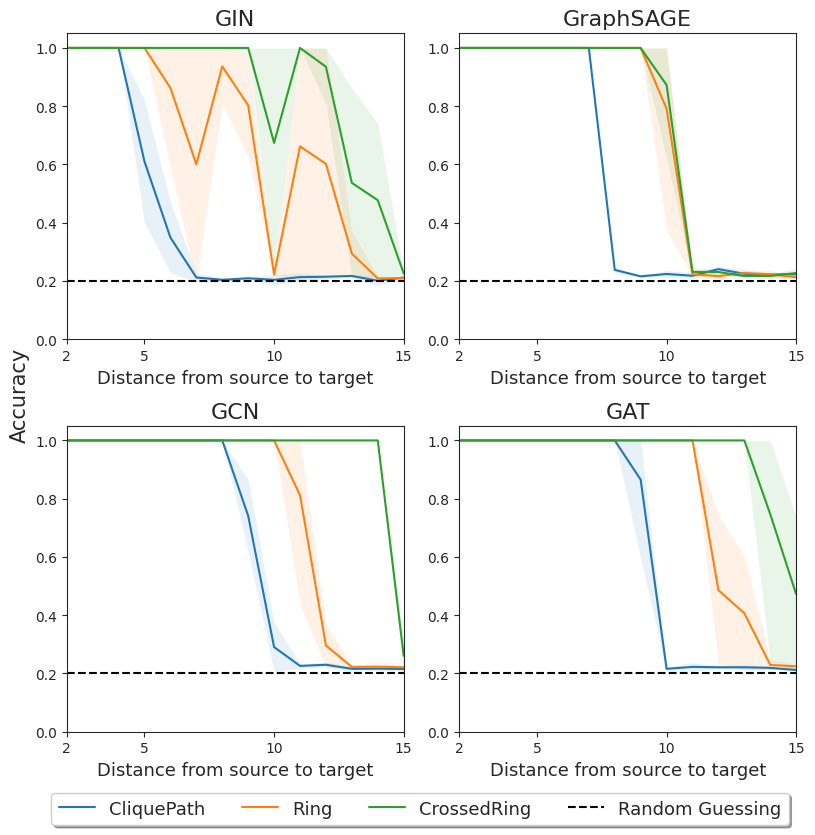

In [64]:
# plt.figure(figsize=(12, 6))
# import scienceplots
# plt.style.use(['science', 'nature', 'no-latex'])
x_label_size = 13
title_size = 16
import seaborn as sns
sns.set_style("ticks")
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
fig.tight_layout() 
sns.set_style("ticks")
alpha=0.1
plt.subplot(221)
res_mean, res_std, res_min, res_max = results["lollipop-gin"]
plt.plot(distances, res_mean, label="CliquePath")
plt.fill_between(distances, res_mean - res_min, np.clip(res_mean + res_max, 0.0, 1.0), alpha=alpha)

res_mean, res_std, res_min, res_max = results["ring-gin"]
plt.plot(distances, res_mean, label="Ring")
plt.fill_between(distances, res_mean - res_min, np.clip(res_mean + res_max, 0.0, 1.0), alpha=alpha)

res_mean, res_std, res_min, res_max = results["crossed-ring-gin"]
plt.plot(distances, res_mean, label="CrossedRing")
plt.fill_between(distances, res_mean - res_min, np.clip(res_mean + res_max, 0.0, 1.0), alpha=alpha)


plt.axhline(y=1/5, linestyle='--', color="k", label="Random Guessing")


# plt.legend()
plt.title(fr"GIN", fontsize=title_size)

plt.xlabel('Distance from source to target', fontsize=x_label_size)
# plt.xlabel('Synthetic Graph Sizes')
# plt.ylabel('Accuracy', fontsize=12)
# plt.savefig("figures/synthetic_3_classes_train.pdf", bbox_inches='tight')
plt.xticks([2, 5, 10, 15])
plt.ylim(0.0, 1.05)

plt.xlim([2, 15])
plt.subplot(223)

res_mean, res_std, res_min, res_max = results["lollipop-gcn"]
plt.plot(distances, res_mean, label="CliquePath")
plt.fill_between(distances, res_mean - res_min, np.clip(res_mean + res_max, 0.0, 1.0), alpha=alpha)

res_mean, res_std, res_min, res_max = results["ring-gcn"]
plt.plot(distances, res_mean, label="Ring")
plt.fill_between(distances, res_mean - res_min, np.clip(res_mean + res_max, 0.0, 1.0), alpha=alpha)

res_mean, res_std, res_min, res_max = results["crossed-ring-gcn"]
plt.plot(distances, res_mean, label="CrossedRing")
plt.fill_between(distances, res_mean - res_min, np.clip(res_mean + res_max, 0.0, 1.0), alpha=alpha)


plt.axhline(y=1/5, linestyle='--', color="k", label="Random Guessing")



plt.title(fr"GCN", fontsize=title_size)
plt.xlabel('Distance from source to target', fontsize=x_label_size)
# plt.ylabel('Accuracy')
# plt.savefig("figures/synthetic_3_classes_train.pdf", bbox_inches='tight')
plt.xticks([2, 5, 10, 15])
plt.ylim(0.0, 1.05)

plt.xlim([2, 15])

plt.subplot(222)

res_mean, res_std, res_min, res_max = results["lollipop-sage"]
plt.plot(distances, res_mean, label="CliquePath")
plt.fill_between(distances, res_mean - res_min, np.clip(res_mean + res_max, 0.0, 1.0), alpha=alpha)

res_mean, res_std, res_min, res_max = results["ring-sage"]
plt.plot(distances, res_mean, label="Ring")
plt.fill_between(distances, res_mean - res_min, np.clip(res_mean + res_max, 0.0, 1.0), alpha=alpha)

res_mean, res_std, res_min, res_max = results["crossed-ring-sage"]
plt.plot(distances, res_mean, label="CrossedRing")
plt.fill_between(distances, res_mean - res_min, np.clip(res_mean + res_max, 0.0, 1.0), alpha=alpha)


plt.axhline(y=1/5, linestyle='--', color="k", label="Random Guessing")
plt.title(fr"GraphSAGE", fontsize=title_size)

plt.xlabel('Distance from source to target', fontsize=x_label_size)
# plt.xlabel('Distance from source to target')
# plt.ylabel('Accuracy')
plt.xticks([2, 5, 10, 15])
plt.ylim(0.0, 1.05)

plt.xlim([2, 15])
plt.subplot(224)

res_mean, res_std, res_min, res_max = results["lollipop-gat"]
plt.plot(distances, res_mean, label="CliquePath")
plt.fill_between(distances, res_mean - res_min, np.clip(res_mean + res_max, 0.0, 1.0), alpha=alpha)

res_mean, res_std, res_min, res_max = results["ring-gat"]
plt.plot(distances, res_mean, label="Ring")
plt.fill_between(distances, res_mean - res_min, np.clip(res_mean + res_max, 0.0, 1.0), alpha=alpha)

res_mean, res_std, res_min, res_max = results["crossed-ring-gat"]
plt.plot(distances, res_mean, label="CrossedRing")
plt.fill_between(distances, res_mean - res_min, np.clip(res_mean + res_max, 0.0, 1.0), alpha=alpha)


plt.axhline(y=1/5, linestyle='--', color="k", label="Random Guessing")


# plt.legend()
plt.title(fr"GAT", fontsize=title_size)
plt.xlabel('Distance from source to target', fontsize=x_label_size)
# plt.ylabel('Accuracy')
plt.xticks([2, 5, 10, 15])
plt.ylim(0.0, 1.05)

plt.xlim([2, 15])
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
fig.text(0, 0.5, 'Accuracy',  size=15, ha='center', va='center', rotation='vertical')
plt.figlegend(by_label.values(), by_label.keys(), loc='lower center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=4, fontsize=13)
# fig.text(0.5, 0, 'Distance from source to target',  size=15, ha='center', va='center', rotation='horizontal')

plt.tight_layout()
plt.savefig("synthetic-graph-transfer.pdf", bbox_inches='tight')

plt.show()

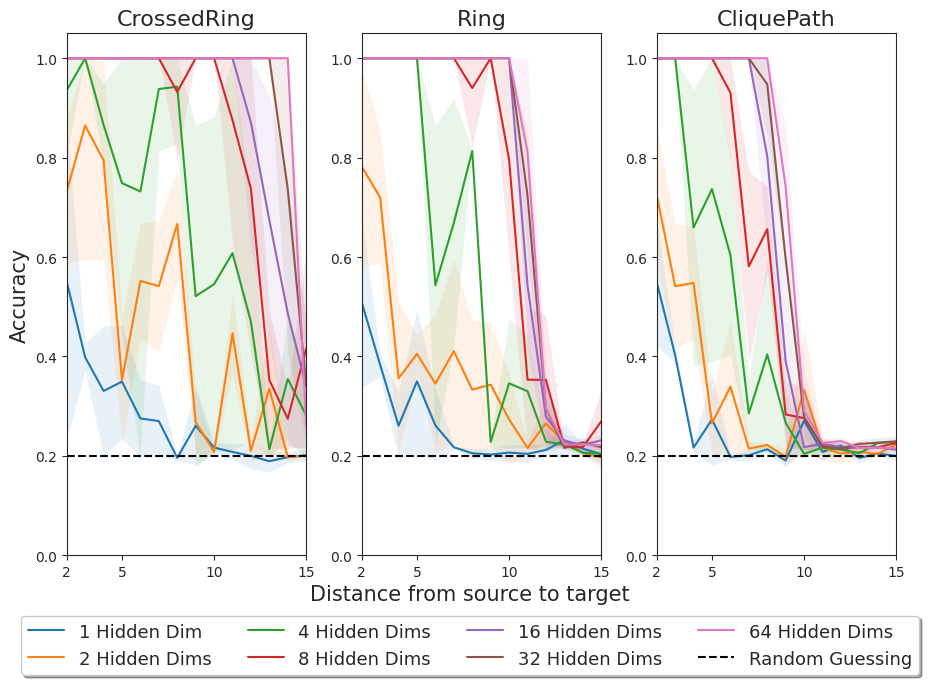

In [51]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9, 6))
fig.tight_layout() 
sns.set_style("ticks")
alpha=0.1
plt.subplot(132)

res_mean, res_std, res_min, res_max = results["ring-gcn-hidden-dim-1"]
plt.plot(distances, res_mean, label="1 Hidden Dim")
plt.fill_between(distances, res_mean - res_min, np.clip(res_mean + res_max, 0.0, 1.0), alpha=alpha)

res_mean, res_std, res_min, res_max = results["ring-gcn-hidden-dim-2"]
plt.plot(distances, res_mean, label="2 Hidden Dims")
plt.fill_between(distances, res_mean - res_min, np.clip(res_mean + res_max, 0.0, 1.0), alpha=alpha)

res_mean, res_std, res_min, res_max = results["ring-gcn-hidden-dim-4"]
plt.plot(distances, res_mean, label="4 Hidden Dims")
plt.fill_between(distances, res_mean - res_min, np.clip(res_mean + res_max, 0.0, 1.0), alpha=alpha)

res_mean, res_std, res_min, res_max = results["ring-gcn-hidden-dim-8"]
plt.plot(distances, res_mean, label="8 Hidden Dims")
plt.fill_between(distances, res_mean - res_min, np.clip(res_mean + res_max, 0.0, 1.0), alpha=alpha)

res_mean, res_std, res_min, res_max = results["ring-gcn-hidden-dim-16"]
plt.plot(distances, res_mean, label="16 Hidden Dims")
plt.fill_between(distances, res_mean - res_min, np.clip(res_mean + res_max, 0.0, 1.0), alpha=alpha)

res_mean, res_std, res_min, res_max = results["ring-gcn-hidden-dim-32"]
plt.plot(distances, res_mean, label="32 Hidden Dims")
plt.fill_between(distances, res_mean - res_min, np.clip(res_mean + res_max, 0.0, 1.0), alpha=alpha)

res_mean, res_std, res_min, res_max = results["ring-gcn"]
plt.plot(distances, res_mean, label="64 Hidden Dims")
plt.fill_between(distances, res_mean - res_min, np.clip(res_mean + res_max, 0.0, 1.0), alpha=alpha)

plt.axhline(y=1/5, linestyle='--', color='k', label="Random Guessing")


# plt.legend()
plt.title(fr"Ring", fontsize=title_size)
# plt.xlabel('Distance from source to target', fontsize=x_label_size)
# plt.xlabel('Synthetic Graph Sizes')
# plt.ylabel('Accuracy', fontsize=12)
# plt.savefig("figures/synthetic_3_classes_train.pdf", bbox_inches='tight')
plt.xticks([2, 5, 10, 15])
plt.ylim(0.0, 1.05)

plt.xlim([2, 15])
plt.subplot(131)

res_mean, res_std, res_min, res_max = results["crossed-ring-gcn-hidden-dim-1"]
plt.plot(distances, res_mean, label="1 Hidden Dim")
plt.fill_between(distances, res_mean - res_min, np.clip(res_mean + res_max, 0.0, 1.0), alpha=alpha)

res_mean, res_std, res_min, res_max = results["crossed-ring-gcn-hidden-dim-2"]
plt.plot(distances, res_mean, label="2 Hidden Dims")
plt.fill_between(distances, res_mean - res_min, np.clip(res_mean + res_max, 0.0, 1.0), alpha=alpha)

res_mean, res_std, res_min, res_max = results["crossed-ring-gcn-hidden-dim-4"]
plt.plot(distances, res_mean, label="4 Hidden Dims")
plt.fill_between(distances, res_mean - res_min, np.clip(res_mean + res_max, 0.0, 1.0), alpha=alpha)

res_mean, res_std, res_min, res_max = results["crossed-ring-gcn-hidden-dim-8"]
plt.plot(distances, res_mean, label="8 Hidden Dims")
plt.fill_between(distances, res_mean - res_min, np.clip(res_mean + res_max, 0.0, 1.0), alpha=alpha)

res_mean, res_std, res_min, res_max = results["crossed-ring-gcn-hidden-dim-16"]
plt.plot(distances, res_mean, label="16 Hidden Dims")
plt.fill_between(distances, res_mean - res_min, np.clip(res_mean + res_max, 0.0, 1.0), alpha=alpha)

res_mean, res_std, res_min, res_max = results["crossed-ring-gcn-hidden-dim-32"]
plt.plot(distances, res_mean, label="32 Hidden Dims")
plt.fill_between(distances, res_mean - res_min, np.clip(res_mean + res_max, 0.0, 1.0), alpha=alpha)

res_mean, res_std, res_min, res_max = results["crossed-ring-gcn"]
plt.plot(distances, res_mean, label="64 Hidden Dims")
plt.fill_between(distances, res_mean - res_min, np.clip(res_mean + res_max, 0.0, 1.0), alpha=alpha)

plt.axhline(y=1/5, linestyle='--', color='k', label="Random Guessing")


plt.title(fr"CrossedRing", fontsize=title_size)
# plt.xlabel('Distance from source to target', fontsize=x_label_size)
# plt.ylabel('Accuracy')
# plt.savefig("figures/synthetic_3_classes_train.pdf", bbox_inches='tight')
plt.xticks([2, 5, 10, 15])
plt.ylim(0.0, 1.05)
plt.xlim([2, 15])

plt.subplot(133)

res_mean, res_std, res_min, res_max = results["lollipop-gcn-hidden-dim-1"]
plt.plot(distances, res_mean, label="1 Hidden Dim")
plt.fill_between(distances, res_mean - res_min, np.clip(res_mean + res_max, 0.0, 1.0), alpha=alpha)

res_mean, res_std, res_min, res_max = results["lollipop-gcn-hidden-dim-2"]
plt.plot(distances, res_mean, label="2 Hidden Dims")
plt.fill_between(distances, res_mean - res_min, np.clip(res_mean + res_max, 0.0, 1.0), alpha=alpha)

res_mean, res_std, res_min, res_max = results["lollipop-gcn-hidden-dim-4"]
plt.plot(distances, res_mean, label="4 Hidden Dims")
plt.fill_between(distances, res_mean - res_min, np.clip(res_mean + res_max, 0.0, 1.0), alpha=alpha)

res_mean, res_std, res_min, res_max = results["lollipop-gcn-hidden-dim-8"]
plt.plot(distances, res_mean, label="8 Hidden Dims")
plt.fill_between(distances, res_mean - res_min, np.clip(res_mean + res_max, 0.0, 1.0), alpha=alpha)

res_mean, res_std, res_min, res_max = results["lollipop-gcn-hidden-dim-16"]
plt.plot(distances, res_mean, label="16 Hidden Dims")
plt.fill_between(distances, res_mean - res_min, np.clip(res_mean + res_max, 0.0, 1.0), alpha=alpha)

res_mean, res_std, res_min, res_max = results["lollipop-gcn-hidden-dim-32"]
plt.plot(distances, res_mean, label="32 Hidden Dims")
plt.fill_between(distances, res_mean - res_min, np.clip(res_mean + res_max, 0.0, 1.0), alpha=alpha)

res_mean, res_std, res_min, res_max = results["lollipop-gcn"]
plt.plot(distances, res_mean, label="64 Hidden Dims")
plt.fill_between(distances, res_mean - res_min, np.clip(res_mean + res_max, 0.0, 1.0), alpha=alpha)

plt.axhline(y=1/5, linestyle='--', color='k', label="Random Guessing")


# plt.legend()
plt.title(fr"CliquePath", fontsize=title_size)
# plt.xlabel('Distance from source to target')
# plt.ylabel('Accuracy')

# plt.xlabel('Distance from source to target', fontsize=x_label_size)
plt.xticks([2, 5, 10, 15])
plt.ylim(0.0, 1.05)
plt.xlim([2, 15])
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
fig.text(0, 0.5, 'Accuracy',  size=15, ha='center', va='center', rotation='vertical')
fig.text(0.5, 0, 'Distance from source to target',  size=15, ha='center', va='center', rotation='horizontal')
plt.figlegend(by_label.values(), by_label.keys(), loc='lower center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=4, fontsize=13)

plt.tight_layout()
plt.savefig("synthetic-graph-hidden-dim.pdf", bbox_inches='tight')

plt.show()